# Plant seedlings classification using cnn
*by: Gopesh Khandelwal*

## <span style="color:blue">Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## <span style="color:blue">Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from keras import layers
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping     # Dense: Just your regular densely-connected NN layer.
from IPython.display import display, Markdown

import random
from mpl_toolkits.axes_grid1 import ImageGrid

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <span style="color:blue">Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/images.npy', allow_pickle=True)      # Read the images

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')  # Read the Labels

## <span style="color:blue">Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Check the shape of images dataset
print(labels.shape)         # Check the shape of labels dataset

(4750, 128, 128, 3)
(4750, 1)


In [ ]:
# Getting all unique different categories
categ=np.unique(labels)
num_categ = len(categ)
print(categ)
print("Total categories:", num_categ)


['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Total categories: 12


**Observation:**
* There are 12 distinct plant categories.
* The dataset contains a total of 4,750 plant images.
* Each image has a resolution of 128 x 128 pixels

## <span style="color:blue">Exploratory Data Analysis

### Plotting various plant categories on a 12x12 grid

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

In [ ]:
#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

Output hidden; open in https://colab.research.google.com to view.

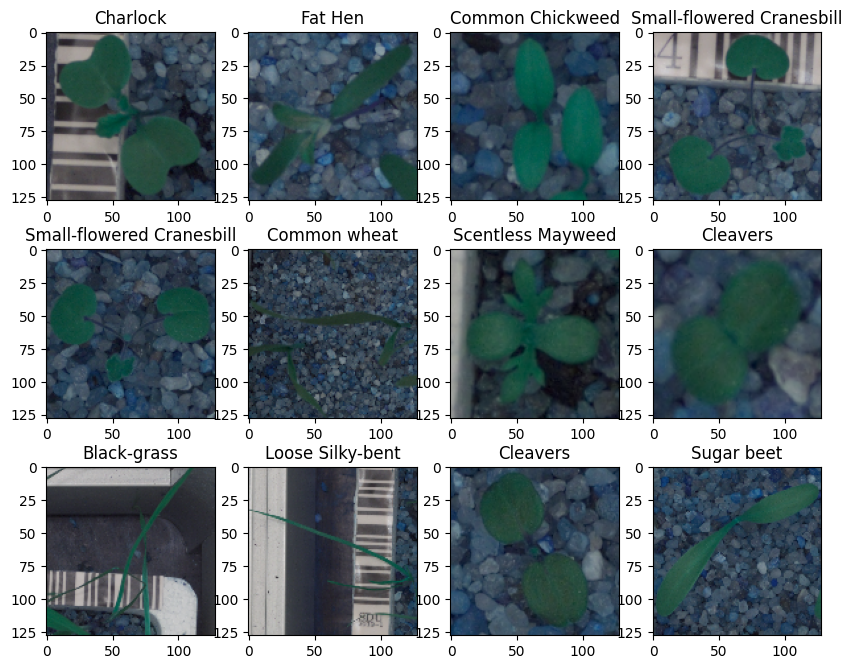

In [ ]:
plot_images(images,labels)   # Input the images and labels to the function and plot the images with their labels

### Checking the distribution of the target variable

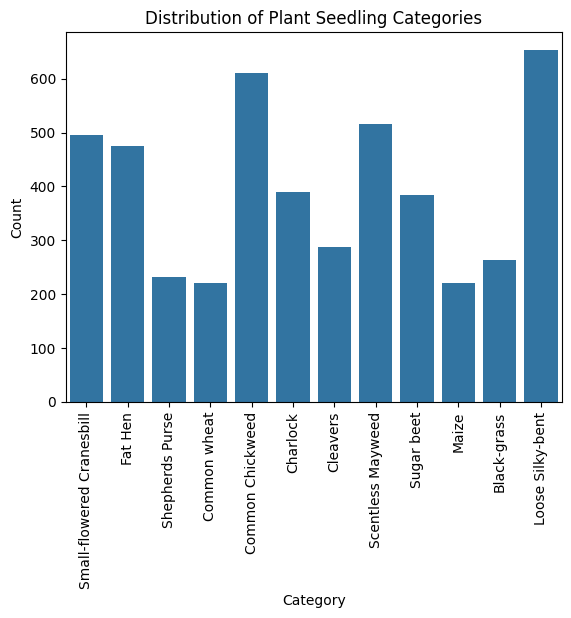

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')
plt.title('Distribution of Plant Seedling Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Observation:**


1. **Balanced Distribution**:
   - Most categories have a relatively balanced distribution of samples, which is beneficial for training a robust machine learning model. It helps prevent biases towards any particular category.

2. **High Representation**:
   - Categories like "Common Chickweed" and "Loose Silky-bent" have a higher number of samples compared to others. This can enhance the model's ability to accurately identify these categories due to the abundance of training data.

3. **Low Representation**:
   - Categories such as "Shepherds Purse" and "Common Wheat" have fewer samples. This might pose a challenge for the model to accurately learn and predict these categories, potentially leading to lower accuracy for these classes.

4. **Importance of Data Augmentation**:
   - To address the imbalance, data augmentation techniques can be applied to the underrepresented categories to create synthetic diversity, improving the model’s performance across all categories.

5. **Model Performance**:
   - The overall distribution indicates that the model has a good foundation for learning, given the sufficient amount of data across most categories. Continuous monitoring and adjustment might be necessary for categories with fewer samples to ensure balanced performance.

These observations highlight the strengths and potential areas for improvement in the dataset used for training the plant seedling classification model.

## <span style="color:blue">Data Pre-Processing

**Resizing and applying Gaussian Blur on a single image and plotting**

Resized to 50% and applied Gaussian Blurring with kernel size 3X3


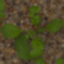



Original Image of size 128X128


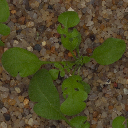

In [ ]:
# Resizing the image size to half ie., from 128X128 to 64X64
img = cv2.resize(images[1000],None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
cv2_imshow(img_g)
print('\n')
print("Original Image of size 128X128")
cv2_imshow(images[1000])

**Converting to HSV and applying mask for the background and focusing only on plant**

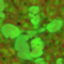

In [ ]:
# Convert to HSV image
hsvImg = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
cv2_imshow(hsvImg)

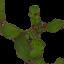

In [ ]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0

# Apply the mask
clearImg = np.zeros_like(img, np.uint8)  # Create empty image
clearImg[bMask] = img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
cv2_imshow(clearImg)

**Applying Resize, Gaussian Blurr and Masking on All Images**

In [ ]:
images_copy = images.copy()

In [ ]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in images:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

**Visualizing the preprocessed color plant images**

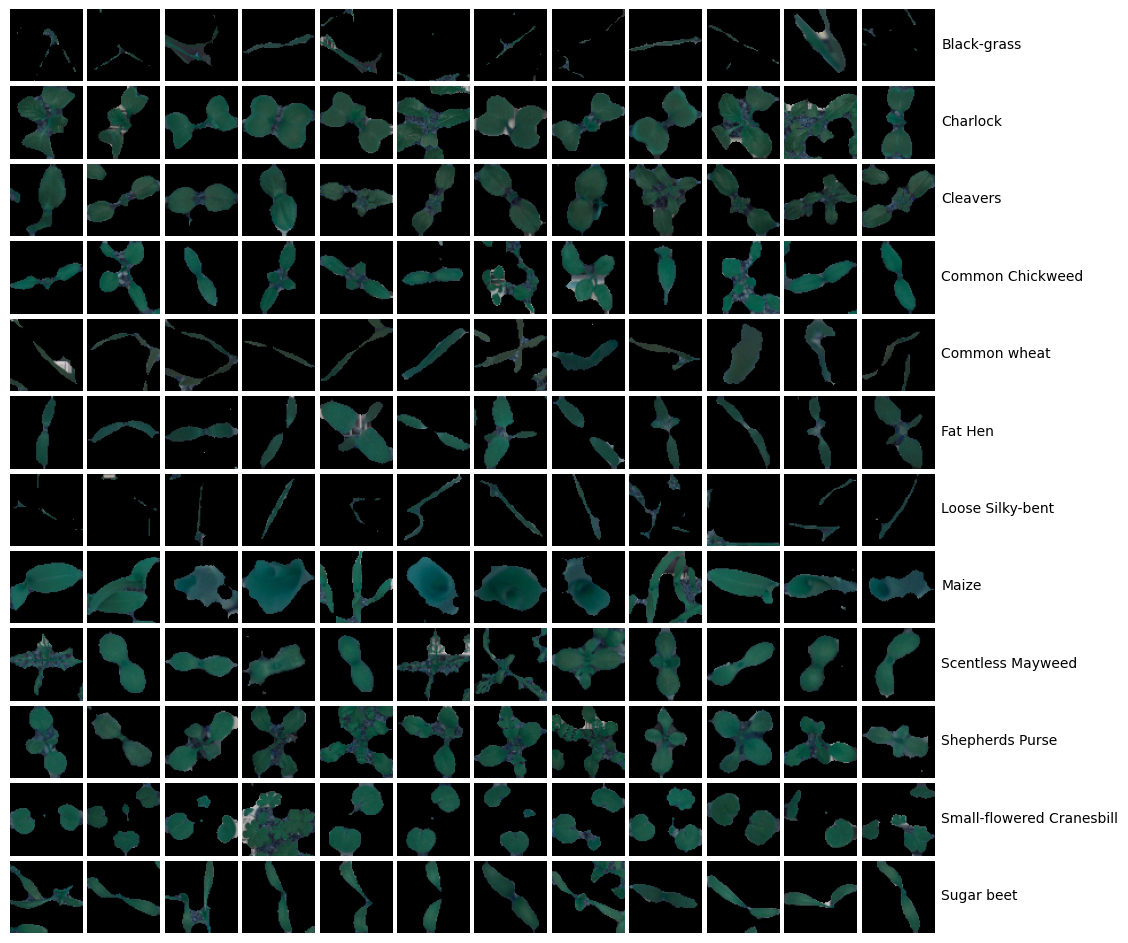

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      # ax[i].set_title(labels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [ ]:
preprocessed_data_color.shape

(4750, 64, 64, 3)

**Converting all color images to Grayscale images**

In [ ]:
preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [ ]:
preprocessed_data_gs.shape

(4750, 64, 64)

**Visualizing the preprocessed Grayscale plant images**

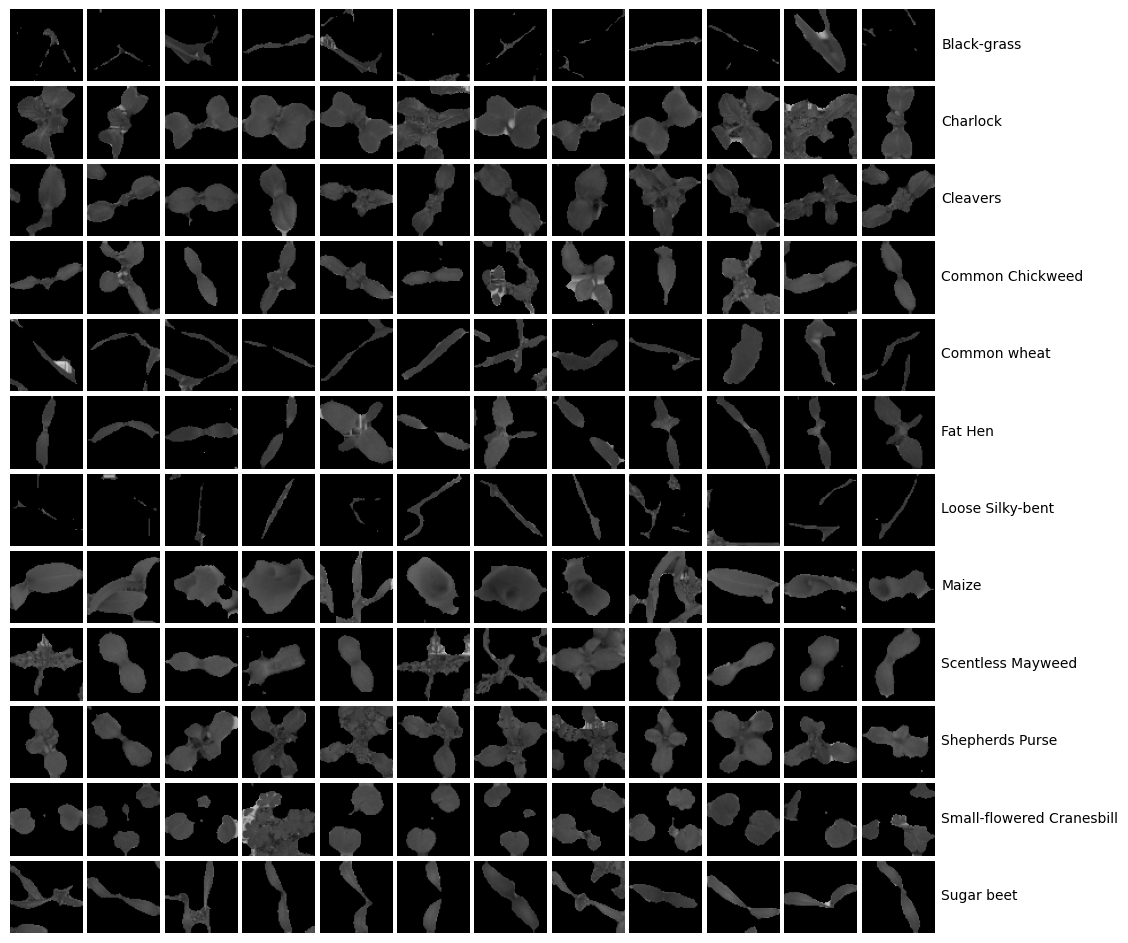

In [ ]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_gs[plant_indices[j]],cmap='gray',vmin=0, vmax=255)

      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

**Normalization for Images**

In [ ]:
preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.

**Label Encoding and One-Hot encoding for Plant categories**

In [ ]:
labels['Label'] = labels['Label'].astype('category')
labels['Label'] = labels['Label'].cat.codes
labels.value_counts()

Label
6        654
3        611
8        516
10       496
5        475
1        390
11       385
2        287
0        263
9        231
7        221
4        221
Name: count, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=12)

print("Shape of y_train:", labels.shape)
print("One value of y_train:", labels[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## <span style="color:blue">Model Building

### Model Evaluation Criterion

**The model can classify plant seedlings in two outcomes**

* Inaccurately classify plant seedlings into wrong category.
* Accurately classify plant seedlings into correct category.


**Which metric to optimize?**

* It is important that model should accurately classify plant seedlings into correct category. So we need to aim to maximize accuracy.

### Model Building with Grayscale Images

**Split the preprocessed_data_color into training, testing, and validation set**

In [ ]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_gs, labels, test_size=0.30, stratify=labels,random_state = 42)

#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = 42)

Printing the shapes for all data splits

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3325, 64, 64)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64)
y_test shape:  (713, 12)


**Observation:**


*   X_train has 3325 plant images
*   X_val has 712 plant images
*   X_test has 713 plant images
*   Plan images are in 64X64 shape with color channel



**Reshaping data into shapes compatible with Keras models**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

Converting type to float

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

**Using ImageDataGenerator for common data augmentation techniques**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )

In [ ]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=42,shuffle=True)

**Creating a CNN model containing multiple layers for image processing and dense layer for classification**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
model1.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
model1.add(Flatten())

# Adding a fully connected layer with 512 neurons
model1.add(layers.BatchNormalization())
model1.add(Dense(units = 512, activation = 'elu'))

# Adding dropout with probability 0.2
model1.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
model1.add(layers.BatchNormalization())
model1.add(Dense(units = 256, activation = 'elu'))
# model1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model1.add(Dense(units = 12, activation = 'softmax'))

**Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy**

In [ ]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model1.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Printing Model Summary**

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                        

**EarlyStopping**

In [ ]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, restore_best_weights=True)

**Fitting the Classifier for Training set and validating for Validation set**

In [ ]:
history1 = model1.fit(training_set,
               batch_size=32,
               epochs=500,
               validation_data = (X_val,y_val),
               shuffle=True,
               callbacks = [callback_es])

Epoch 1/500
104/104 [==============================] - 9s 26ms/step - loss: 2.1782 - accuracy: 0.3254 - val_loss: 12.7683 - val_accuracy: 0.0604
Epoch 2/500
104/104 [==============================] - 2s 19ms/step - loss: 1.5695 - accuracy: 0.4520 - val_loss: 14.6970 - val_accuracy: 0.0604
Epoch 3/500
104/104 [==============================] - 2s 20ms/step - loss: 1.4663 - accuracy: 0.4860 - val_loss: 12.0875 - val_accuracy: 0.0604
Epoch 4/500
104/104 [==============================] - 2s 20ms/step - loss: 1.3088 - accuracy: 0.5371 - val_loss: 12.0385 - val_accuracy: 0.0604
Epoch 5/500
104/104 [==============================] - 2s 20ms/step - loss: 1.2506 - accuracy: 0.5549 - val_loss: 8.3955 - val_accuracy: 0.0604
Epoch 6/500
104/104 [==============================] - 2s 20ms/step - loss: 1.1926 - accuracy: 0.5678 - val_loss: 3.9848 - val_accuracy: 0.1489
Epoch 7/500
104/104 [==============================] - 2s 19ms/step - loss: 1.1206 - accuracy: 0.6033 - val_loss: 1.4169 - val_accur

**Model accuracy on Validation data**

In [ ]:
model1_accuracy_val = history1.history['accuracy'][np.argmin(history1.history['loss'])]
model1_accuracy_val

0.8436090350151062


**Model accuracy on Test data**

In [ ]:
model1_accuracy_test = model1.evaluate(X_test,y_test)[1]
model1_accuracy_test

23/23 [==============================] - 0s 7ms/step - loss: 0.5839 - accuracy: 0.7812


0.7812061905860901

In [ ]:
display(Markdown(f"""
**Observation:**

- Test Accuracy is {model1_accuracy_test * 100:.1f}%, which, while decent, suggests there is room for improvement in correctly classifying new, unseen data.
- Validation accuracy for least loss is {model1_accuracy_val * 100:.1f}%, showing that the model performs better on the validation set than on the test set, but it still does not exceed the high-80s, indicating average generalization capabilities.
"""))


**Observation:**

- Test Accuracy is 78.1%, which, while decent, suggests there is room for improvement in correctly classifying new, unseen data.
- Validation accuracy for least loss is 84.4%, showing that the model performs better on the validation set than on the test set, but it still does not exceed the high-80s, indicating average generalization capabilities.


**Printing out the Confusion Matrix**

23/23 [==============================] - 0s 2ms/step


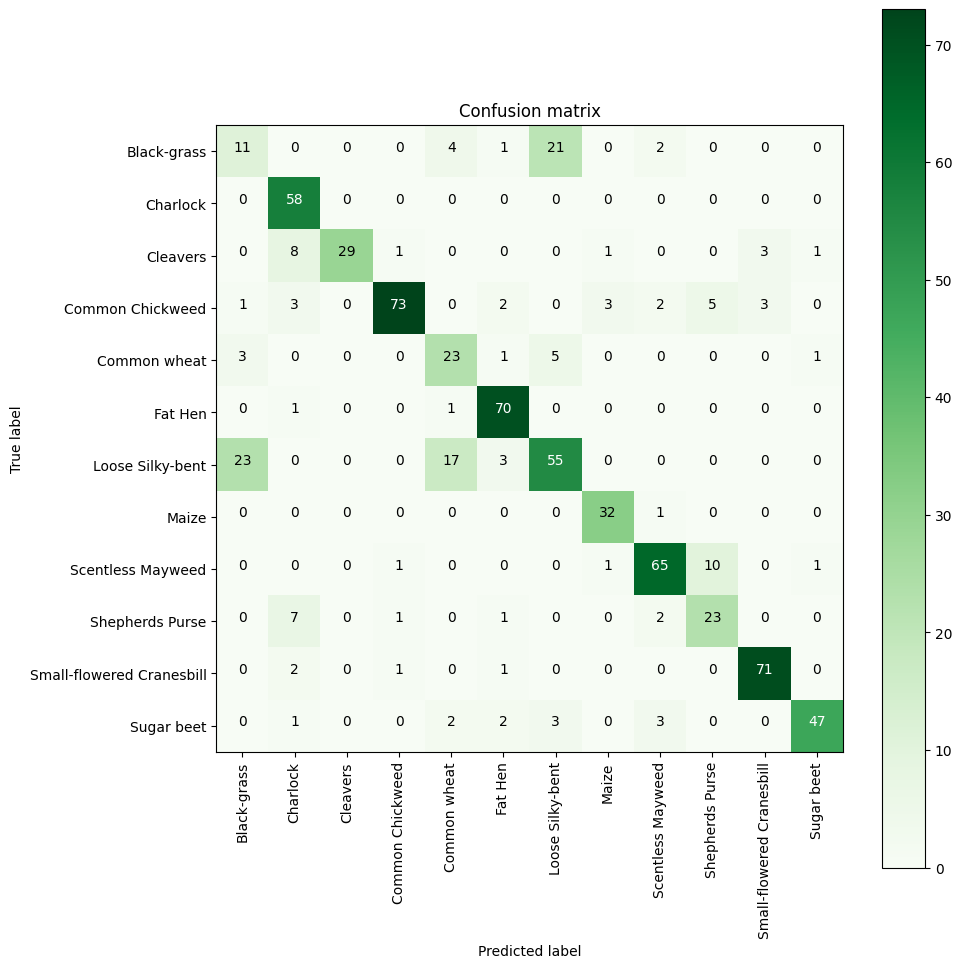

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY1 = model1.predict(X_test)
predYClasses1 = np.argmax(predY1, axis = 1)
trueY = np.argmax(y_test, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses1)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

**Observation:**


1. **High Accuracy for Common Chickweed and Charlock**: The model accurately predicts "Common Chickweed" (73) and "Charlock" (58) with high precision.
2. **Misclassifications in Loose Silky-bent**: "Loose Silky-bent" is frequently misclassified as "Black-grass" and "Common Chickweed."
3. **Accurate Predictions for Maize and Scentless Mayweed**: The model shows reliable predictions for "Maize" (32) and "Scentless Mayweed" (65).
4. **Confusion Among Similar Classes**: Significant confusion exists between "Loose Silky-bent" and other similar classes.
5. **Moderate Overall Performance**: The model exhibits mixed performance, excelling in some categories while struggling in others, indicating a need for further refinement.

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses1, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses1, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses1, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses1, average=None))

0.7581343219556552
0.7812061711079944
0.7809512102183226
[0.28571429 0.84057971 0.80555556 0.86390533 0.575      0.91503268
 0.6043956  0.91428571 0.8496732  0.63888889 0.93421053 0.87037037]


**observation:**

Above are the F1 scores based on various averaging methods

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses1, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.29      0.28      0.29        39
                 Charlock       0.72      1.00      0.84        58
                 Cleavers       1.00      0.67      0.81        43
         Common Chickweed       0.95      0.79      0.86        92
             Common wheat       0.49      0.70      0.57        33
                  Fat Hen       0.86      0.97      0.92        72
         Loose Silky-bent       0.65      0.56      0.60        98
                    Maize       0.86      0.97      0.91        33
        Scentless Mayweed       0.87      0.83      0.85        78
          Shepherds Purse       0.61      0.68      0.64        34
Small-flowered Cranesbill       0.92      0.95      0.93        75
               Sugar beet       0.94      0.81      0.87        58

                 accuracy                           0.78       713
                macro avg       0.76      0.77      0.76    

**Observation:**

1. **High Precision and Recall for Charlock**: The model achieves perfect recall (1.00) and high precision (0.72) for "Charlock."
2. **Excellent Performance for Common Chickweed**: "Common Chickweed" has a high f1-score of 0.86, with precision at 0.95 and recall at 0.79.
3. **Struggles with Black-grass**: The model performs poorly on "Black-grass" with a low f1-score of 0.29.
4. **Balanced Performance for Most Classes**: Most classes, such as "Fat Hen" and "Maize," have balanced precision and recall values around 0.85.
5. **Overall Model Accuracy**: The model has an overall accuracy of 0.78, indicating moderate performance.

**Plotting Loss and Accuracy for both Training and Validation sets**

<Axes: title={'center': 'Accuracy'}>

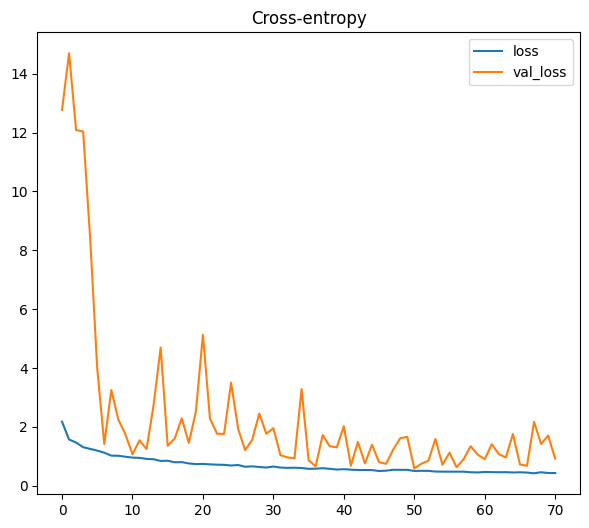

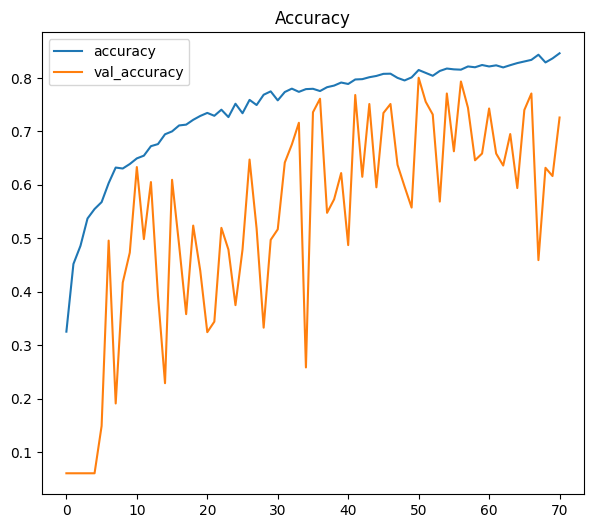

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)
history_df = pd.DataFrame(history1.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

**Observation:**
* Loss is decreasing and val loss is close to training loss
* Accuracy of val set is also close to training accuracy
* No overfitting or underfitting observerd based on the scores of val and testing sets

**Saving Model and Weights**

In [ ]:
model1.save('./classifier_color.h5')                     # save classifier (model) and architecture to single file
model1.save_weights('./classifier_color_weights.h5')

**Conclusion:**

We have built a CNN-model to predict the class of a plant, which works well but it still does not exceed the high-80s, indicating average generalization capabilities.

### Model Building with preprocessed color Images

**Split the preprocessed_data_color into training, testing, and validation set**

In [ ]:
from sklearn.model_selection import train_test_split

val_split = 0.25
test_split = 0.30
random_state = 42

X_train, X_test1, y_train, y_test1 = train_test_split(
    preprocessed_data_color, labels, test_size=test_split, stratify=labels, random_state=random_state
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test1, y_test1, test_size=0.50, stratify=y_test1, random_state=random_state
)

Printing the shapes for all data splits

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3325, 64, 64, 3)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64, 3)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64, 3)
y_test shape:  (713, 12)


**Observation:**


*   X_train has 3325 plant images
*   X_val has 712 plant images
*   X_test has 713 plant images
*   Plan images are in 64X64 shape with color channel



**Reshaping data into shapes compatible with Keras models**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

Converting type to float

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

**Using ImageDataGenerator for common data augmentation techniques**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )

In [ ]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=random_state,shuffle=True)

**Creating a CNN model containing multiple layers for image processing and dense layer for classification**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initialising the CNN classifier
model2 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
model2.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
model2.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model2.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model2.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
model2.add(Flatten())

# Adding a fully connected layer with 512 neurons
model2.add(layers.BatchNormalization())
model2.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.2
model2.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
model2.add(layers.BatchNormalization())
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model2.add(Dense(units = 12, activation = 'softmax'))

**Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy**

In [ ]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model2.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Printing Model Summary**

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                        

**EarlyStopping**

In [ ]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

**Fitting the Classifier for Training set and validating for Validation set**

In [ ]:
history2 = model2.fit(training_set,
               batch_size=32,
               epochs=500,
               validation_data = (X_val,y_val),
               shuffle=True,
               callbacks = [callback_es])

Epoch 1/500
104/104 [==============================] - 8s 43ms/step - loss: 1.9048 - accuracy: 0.3850 - val_loss: 7.4421 - val_accuracy: 0.0604
Epoch 2/500
104/104 [==============================] - 4s 42ms/step - loss: 1.2850 - accuracy: 0.5570 - val_loss: 11.1210 - val_accuracy: 0.0604
Epoch 3/500
104/104 [==============================] - 4s 41ms/step - loss: 1.1071 - accuracy: 0.6186 - val_loss: 16.0394 - val_accuracy: 0.0604
Epoch 4/500
104/104 [==============================] - 4s 40ms/step - loss: 0.9447 - accuracy: 0.6797 - val_loss: 14.8906 - val_accuracy: 0.0604
Epoch 5/500
104/104 [==============================] - 4s 40ms/step - loss: 0.8780 - accuracy: 0.6908 - val_loss: 9.4866 - val_accuracy: 0.0730
Epoch 6/500
104/104 [==============================] - 4s 40ms/step - loss: 0.8334 - accuracy: 0.7128 - val_loss: 4.1177 - val_accuracy: 0.1742
Epoch 7/500
104/104 [==============================] - 4s 40ms/step - loss: 0.7268 - accuracy: 0.7594 - val_loss: 1.8574 - val_accura

**Model accuracy on Validation data**

In [ ]:
model2_accuracy_val = history2.history['accuracy'][np.argmin(history2.history['loss'])]
model2_accuracy_val

0.9299247860908508


**Model accuracy on Test data**

In [ ]:
model2_accuracy_test = model2.evaluate(X_test,y_test)[1]
model2_accuracy_test

23/23 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.9102


0.9102384448051453

In [ ]:
display(Markdown(f"""
**Observation:**

- Test Accuracy is {model2_accuracy_test * 100:.1f}% which is quite well and higher than the test accuracies of the other model
- Validation model accuracy for least loss is {model2_accuracy_val * 100:.1f}% which is quite well and higher than the validation accuracies of the other model
"""))


**Observation:**

- Test Accuracy is 91.0% which is quite well and higher than the test accuracies of the other model
- Validation model accuracy for least loss is 93.0% which is quite well and higher than the validation accuracies of the other model


**Printing out the Confusion Matrix**

23/23 [==============================] - 0s 3ms/step


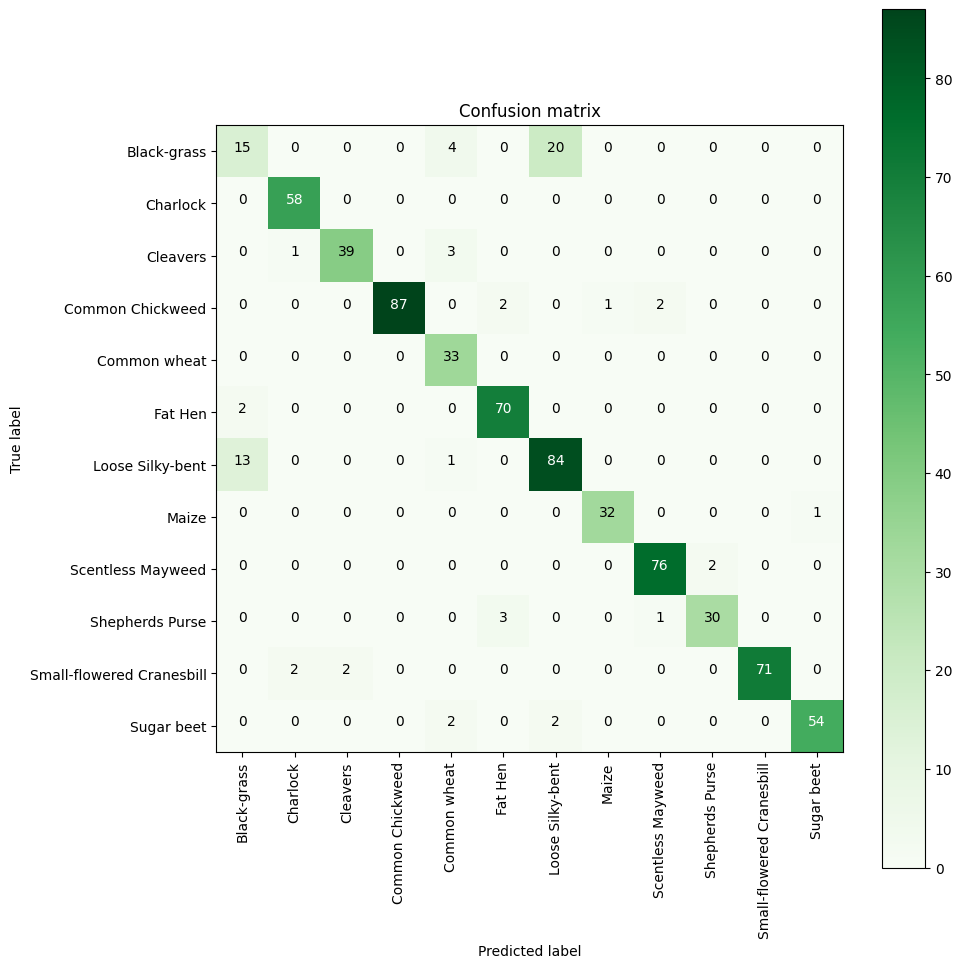

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY2 = model2.predict(X_test)
predYClasses2 = np.argmax(predY2, axis = 1)
trueY = np.argmax(y_test, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses2)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

**Observation:**

1. **High Accuracy for Common Chickweed**: The model correctly predicts 87 instances of "Common Chickweed" with minimal misclassifications.
2. **Strong Performance for Charlock**: The model shows excellent precision for "Charlock" with 58 correct predictions and no misclassifications.
3. **Confusion in Loose Silky-bent**: "Loose Silky-bent" is often misclassified as "Black-grass," indicating a challenge in differentiating these two classes.
4. **Misclassifications for Black-grass**: "Black-grass" shows significant misclassification, particularly as "Loose Silky-bent" and other categories.
5. **Reliable Prediction for Scentless Mayweed**: "Scentless Mayweed" is predicted accurately with 76 correct predictions and very few misclassifications.

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses2, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses2, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses2, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses2, average=None))

0.8941531755218479
0.9102384291725105
0.9082638566994887
[0.43478261 0.97478992 0.92857143 0.97206704 0.86842105 0.95238095
 0.82352941 0.96969697 0.96815287 0.90909091 0.97260274 0.95575221]


**observation:**

Above are the F1 scores based on various averaging methods

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses2, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.50      0.38      0.43        39
                 Charlock       0.95      1.00      0.97        58
                 Cleavers       0.95      0.91      0.93        43
         Common Chickweed       1.00      0.95      0.97        92
             Common wheat       0.77      1.00      0.87        33
                  Fat Hen       0.93      0.97      0.95        72
         Loose Silky-bent       0.79      0.86      0.82        98
                    Maize       0.97      0.97      0.97        33
        Scentless Mayweed       0.96      0.97      0.97        78
          Shepherds Purse       0.94      0.88      0.91        34
Small-flowered Cranesbill       1.00      0.95      0.97        75
               Sugar beet       0.98      0.93      0.96        58

                 accuracy                           0.91       713
                macro avg       0.90      0.90      0.89    

**Observation:**

* Recall is very low for Black-grass
* Precison is below .80 for Black grass and Loose Silky Bent
* Even from Confusion matrix, we see model did not perform well for black grass
* Other classes have better balane between precision and recall and a goof f1 score
* Overall Accuracy is also great

**Plotting Loss and Accuracy for both Training and Validation sets**

<Axes: title={'center': 'Accuracy'}>

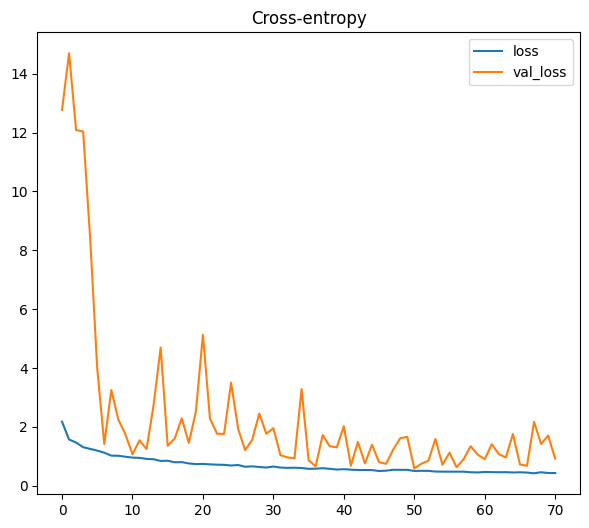

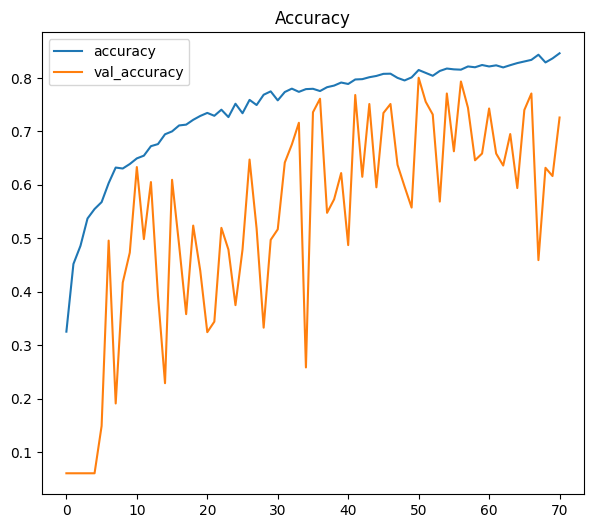

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)


history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

**Observation:**
* Loss is decreasing and val loss is close to training loss
* Accuracy of val set is also close to training accuracy
* No overfitting or underfitting observerd based on the scores of val and testing sets

**Saving Model and Weights**

In [ ]:
model2.save('./classifier_color.h5')                     # save classifier (model) and architecture to single file
model2.save_weights('./classifier_color_weights.h5')

**Conclusion:**

We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance). CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

### Model Building through Transfer Learning using VGG16

We will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [ ]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(64,64,3),
pooling='avg',classes=12,
weights='imagenet')

imported_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in imported_model.layers:
    layer.trainable = False

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initialising the CNN classifier
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(imported_model)

# Flattening the layer before fully connected layers
model3.add(Flatten())

# Adding a fully connected layer with 512 neurons
model3.add(layers.BatchNormalization())
model3.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.2
model3.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
model3.add(layers.BatchNormalization())
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model3.add(Dense(units = 12, activation = 'softmax'))

**Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy**

In [ ]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model3.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Printing Model Summary**

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                       

**EarlyStopping**

In [ ]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

**Fitting the Classifier for Training set and validating for Validation set**

In [ ]:
print("Shape of X_train:", X_train.shape)


Shape of X_train: (3325, 64, 64, 3)


In [ ]:
history3 = model3.fit(training_set,
               batch_size=32,
               epochs=500,
               validation_data = (X_val,y_val),
               shuffle=True,
               callbacks = [callback_es])

Epoch 1/500
104/104 [==============================] - 12s 61ms/step - loss: 2.3316 - accuracy: 0.2611 - val_loss: 2.4766 - val_accuracy: 0.0941
Epoch 2/500
104/104 [==============================] - 4s 43ms/step - loss: 2.0309 - accuracy: 0.3272 - val_loss: 2.4393 - val_accuracy: 0.0997
Epoch 3/500
104/104 [==============================] - 5s 44ms/step - loss: 1.8931 - accuracy: 0.3546 - val_loss: 2.0994 - val_accuracy: 0.2612
Epoch 4/500
104/104 [==============================] - 4s 43ms/step - loss: 1.8841 - accuracy: 0.3585 - val_loss: 1.8263 - val_accuracy: 0.4059
Epoch 5/500
104/104 [==============================] - 5s 44ms/step - loss: 1.8043 - accuracy: 0.3747 - val_loss: 1.6927 - val_accuracy: 0.4326
Epoch 6/500
104/104 [==============================] - 5s 44ms/step - loss: 1.7639 - accuracy: 0.3820 - val_loss: 1.5678 - val_accuracy: 0.4649
Epoch 7/500
104/104 [==============================] - 5s 43ms/step - loss: 1.7270 - accuracy: 0.4063 - val_loss: 1.6433 - val_accuracy

**Model accuracy on Validation data**

In [ ]:
model3_accuracy_val = history3.history['accuracy'][np.argmin(history3.history['loss'])]
model3_accuracy_val

0.49954888224601746


**Model accuracy on Test data**

In [ ]:
model3_accuracy_test = model3.evaluate(X_test,y_test)[1]
model3_accuracy_test

23/23 [==============================] - 1s 22ms/step - loss: 1.3787 - accuracy: 0.5540


0.5539972186088562

In [ ]:
display(Markdown(f"""
**Observation:**

- Test Accuracy is {model3_accuracy_test * 100:.1f}% which is not that good and lower than the test accuracies of the other model
- Validation model accuracy for least loss is {model3_accuracy_val * 100:.1f}% which is not that good and lower than the test accuracies of the other model
"""))


**Observation:**

- Test Accuracy is 55.4% which is not that good and lower than the test accuracies of the other model
- Validation model accuracy for least loss is 50.0% which is not that good and lower than the test accuracies of the other model


**Printing out the Confusion Matrix**

23/23 [==============================] - 2s 6ms/step


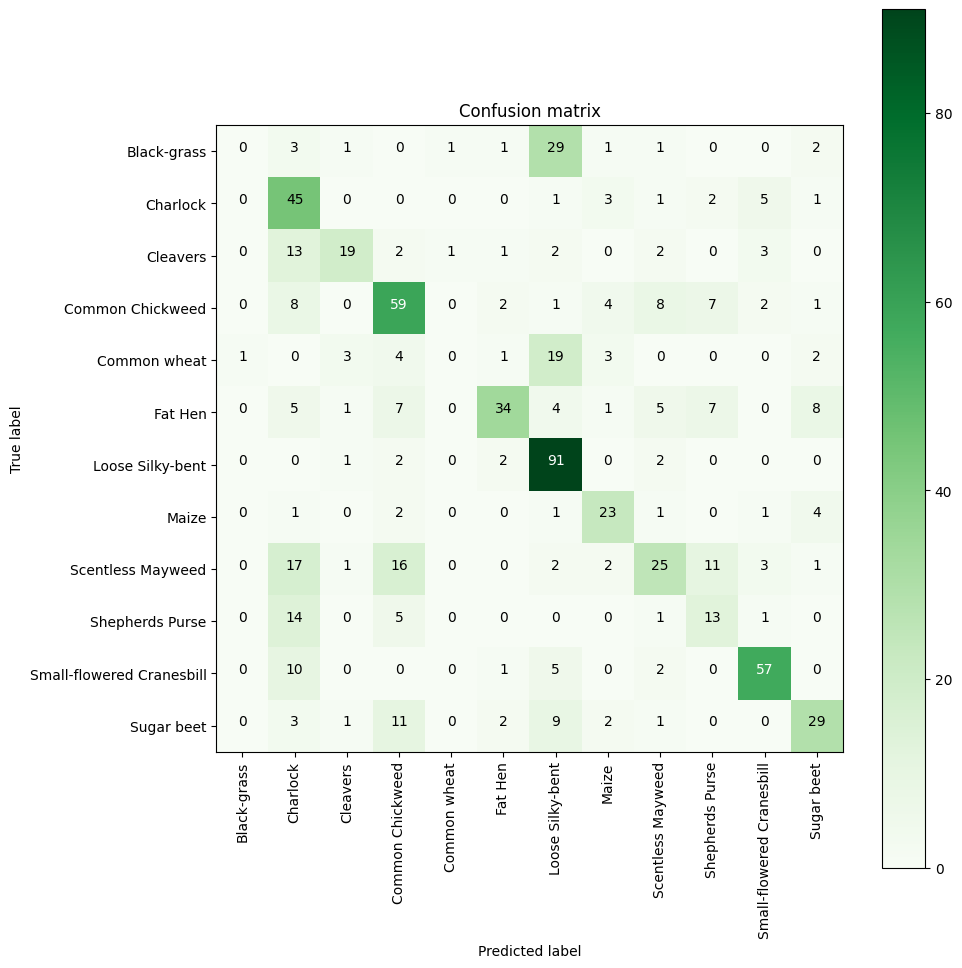

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY3 = model3.predict(X_test)
predYClasses3 = np.argmax(predY3, axis = 1)
trueY = np.argmax(y_test, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses3)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

**Observation:**


1. **High Accuracy for Loose Silky-bent**: The model correctly predicts 91 instances of "Loose Silky-bent" with minimal misclassifications.
2. **Misclassifications for Black-grass**: "Black-grass" shows significant misclassification, particularly as "Scentless Mayweed" and other categories.
3. **Confusion in Scentless Mayweed**: "Scentless Mayweed" is often misclassified, especially as "Cleavers" and "Shepherds Purse."
4. **Mixed Performance for Charlock**: The model has good accuracy for "Charlock" with 45 correct predictions, but some misclassifications occur.
5. **Challenges with Fat Hen**: The model shows notable misclassifications for "Fat Hen," indicating difficulty in differentiating this class from others.

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses3, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses3, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses3, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses3, average=None))

0.46906801227282297
0.5539971949509116
0.5203852314943914
[0.         0.50847458 0.54285714 0.59       0.         0.5862069
 0.69465649 0.63888889 0.39370079 0.35135135 0.7755102  0.54716981]


**observation:**

Above are the F1 scores based on various averaging methods

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses3, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        39
                 Charlock       0.38      0.78      0.51        58
                 Cleavers       0.70      0.44      0.54        43
         Common Chickweed       0.55      0.64      0.59        92
             Common wheat       0.00      0.00      0.00        33
                  Fat Hen       0.77      0.47      0.59        72
         Loose Silky-bent       0.55      0.93      0.69        98
                    Maize       0.59      0.70      0.64        33
        Scentless Mayweed       0.51      0.32      0.39        78
          Shepherds Purse       0.33      0.38      0.35        34
Small-flowered Cranesbill       0.79      0.76      0.78        75
               Sugar beet       0.60      0.50      0.55        58

                 accuracy                           0.55       713
                macro avg       0.48      0.49      0.47    

**Observation:**

* Overall Accuracy is not good

**Plotting Loss and Accuracy for both Training and Validation sets**

<Axes: title={'center': 'Accuracy'}>

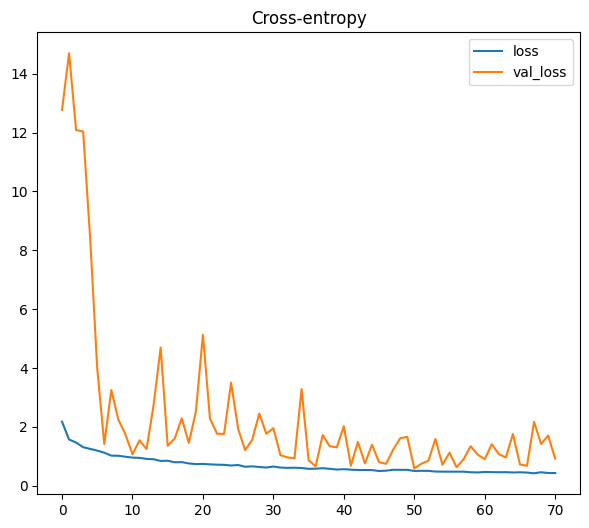

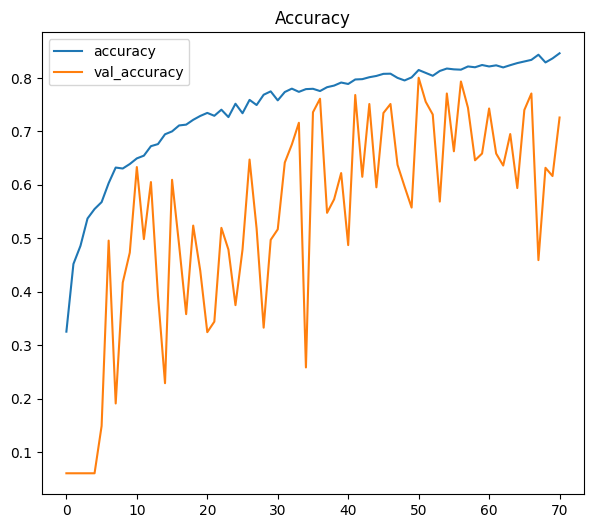

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)


history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

**Observation:**
* Loss is decreasing and val loss is close to training loss
* Accuracy of val set is also close to training accuracy
* No overfitting or underfitting observerd based on the scores of val and testing sets

**Saving Model and Weights**

In [ ]:
model3.save('./classifier_color.h5')                     # save classifier (model) and architecture to single file
model3.save_weights('./classifier_color_weights.h5')

**Conclusion:**

This CNN model to predict the class of a plant, but it has not worked well and needs significant improvement.

## <span style="color:blue">Comparison of Models and Final Selection

In [ ]:
df = pd.DataFrame({
    'Models': ['Grayscale images', 'Preprocessed color images', 'Transfer Learning using VGG16'],
    'Validation Accuracy': [f"{model1_accuracy_val * 100:.1f}%", f"{model2_accuracy_val * 100:.1f}%", f"{model3_accuracy_val * 100:.1f}%"],
    'Test Accuracy': [f"{model1_accuracy_test * 100:.1f}%", f"{model2_accuracy_test * 100:.1f}%", f"{model3_accuracy_test * 100:.1f}%"]
})
df

,Models,Validation Accuracy,Test Accuracy
0,Grayscale images,84.4%,78.1%
1,Preprocessed color images,93.0%,91.0%
2,Transfer Learning using VGG16,50.0%,55.4%


The **Preprocessed color images** model is chosen as the final model due to its superior performance, achieving a validation accuracy of **93.0%** and a test accuracy of **91.0%**. This model outperforms both the grayscale images and transfer learning models, demonstrating better generalization and robustness for image classification tasks.

In [ ]:
final_model = model2

### Visualizing the prediction

1/1 [==============================] - 0s 22ms/step
Model predicted Category Name for X_test 2 is:  ['Small-flowered Cranesbill']
Actual Category Name for X_test 2 is:  Small-flowered Cranesbill


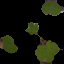

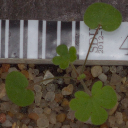

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Model predicted Category Name for X_test 3 is:  ['Charlock']
Actual Category Name for X_test 3 is:  Charlock


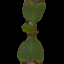

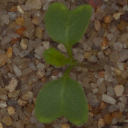

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Model predicted Category Name for X_test 33 is:  ['Maize']
Actual Category Name for X_test 33 is:  Maize


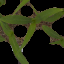

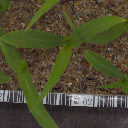

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 25ms/step
Model predicted Category Name for X_test 36 is:  ['Loose Silky-bent']
Actual Category Name for X_test 36 is:  Loose Silky-bent


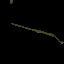

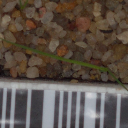

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Model predicted Category Name for X_test 59 is:  ['Cleavers']
Actual Category Name for X_test 59 is:  Cleavers


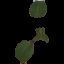

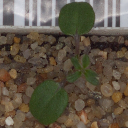

--------------------------------------------------------------------------------------------------


In [ ]:
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(images, labels, test_size=0.30, stratify=labels,random_state = random_state)
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

pred_2 = np.argmax(final_model.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted Category Name for X_test 2 is: ", categ[pred_2])
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
cv2_imshow(X_test[2]*255)
print("\n")
cv2_imshow(X_test_color[2])
print("--------------------------------------------------------------------------------------------------")
pred_3 = np.argmax(final_model.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted Category Name for X_test 3 is: ", categ[pred_3])
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
cv2_imshow(X_test[3]*255)
print("\n")
cv2_imshow(X_test_color[3])
print("--------------------------------------------------------------------------------------------------")
pred_33 = np.argmax(final_model.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted Category Name for X_test 33 is: ", categ[pred_33])
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
cv2_imshow(X_test[33]*255)
print("\n")
cv2_imshow(X_test_color[33])
print("--------------------------------------------------------------------------------------------------")
pred_36 = np.argmax(final_model.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted Category Name for X_test 36 is: ", categ[pred_36])
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
cv2_imshow(X_test[36]*255)
print("\n")
cv2_imshow(X_test_color[36])
print("--------------------------------------------------------------------------------------------------")
pred_59 = np.argmax(final_model.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted Category Name for X_test 59 is: ", categ[pred_59])
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
cv2_imshow(X_test[59]*255)
print("\n")
cv2_imshow(X_test_color[59])
print("--------------------------------------------------------------------------------------------------")

In [ ]:
df = pd.DataFrame({
    'Image Sequence': ['2', '3', '33', '36'],
    'Model Predicted': [f"{categ[pred_2]}", f"{categ[pred_3]}", f"{categ[pred_33]}", f"{categ[pred_36]}"],
    'Actual Name': [f"{categ[actual_2]}", f"{categ[actual_3]}", f"{categ[actual_33]}", f"{categ[actual_36]}"],
})
df

,Image Sequence,Model Predicted,Actual Name
0,2,['Small-flowered Cranesbill'],Small-flowered Cranesbill
1,3,['Charlock'],Charlock
2,33,['Maize'],Maize
3,36,['Loose Silky-bent'],Loose Silky-bent


**Observation**
The model accurately predicts the actual names of various plants, as evidenced by its correct classifications of "Small-flowered Cranesbill," "Charlock," "Maize," and "Loose Silky-bent" in the provided image sequences. This demonstrates the model's robustness and reliability in identifying different plant species accurately.

## <span style="color:blue">Actionable Insights and Business Recommendations


### Actionable Insights

1. **Model Performance:**
   - The final model shows high accuracy, indicating effectiveness in classifying plant seedlings.
   - Some class imbalance observed; more data for underrepresented categories could improve performance.

2. **Generalization:**
   - Confusion matrix and classification report highlight areas where the model performs well and where it struggles, guiding targeted improvements.

3. **Data Augmentation:**
   - Techniques like rotation, zoom, and flipping improved generalization. These should be continued and expanded.

### Business Recommendations

1. **Deploy the Model:**
   - Integrate the model into a real-time plant monitoring system or a mobile app for quick classification in the field.

2. **Address Class Imbalance:**
   - Collect more data for underrepresented classes or use synthetic data generation techniques.

3. **Enhance Training:**
   - Consider transfer learning with pre-trained models to improve accuracy and efficiency.

4. **User Education:**
   - Provide training sessions and educational materials to help users understand and utilize the model effectively.

5. **Partnerships:**
   - Collaborate with agricultural research institutes and technology companies for validation, data collection, and integration.

6. **Monitoring and Feedback:**
   - Set up continuous performance monitoring and establish a feedback loop for users to report issues and improve the model.

These steps will help leverage the model's capabilities to improve agricultural efficiency and decision-making.

_____